<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/PAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# irisで練習

In [0]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()

In [0]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [0]:
X=df.iloc[:,:2]
X["beta_0"]=1
X=X[["beta_0","sepal length (cm)","sepal width (cm)" ]]
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,beta_0,sepal length (cm),sepal width (cm)
0,1,5.1,3.5
1,1,4.9,3.0
2,1,4.7,3.2
3,1,4.6,3.1
4,1,5.0,3.6


In [0]:
y=df[["petal length (cm)","petal width (cm)"]]

In [0]:
beta = np.dot(np.dot(np.linalg.inv( np.dot(X.T , X) ) , X.T), y)

In [0]:
y_hat = np.dot(X, beta)
y_hat

In [0]:
#patal length とpatal width の相関が0.96
Y = y - y_hat
S_Y =np.zeros((2,2))
for j in [0,1]:
    Y_j =Y.iloc[:,j] - np.mean(Y.iloc[:,j])
    for i in [0,1] :
        Y_i =Y.iloc[:,i] - np.mean(Y.iloc[:,i])  
        S_Y[j,i]=np.dot(Y_i, Y_j)
print(S_Y)
pac = S_Y[0,1]/np.sqrt(S_Y[0,0]*S_Y[1,1])
print(pac)

[[61.43674683 32.19796164]
 [32.19796164 22.2547057 ]]
0.870769773836145


# AR

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
def autcor(X, k):
    X_bar = np.mean(X)
    X_bar_k = X_bar * np.ones(k)
    X_k = np.append(X_bar_k ,X)
    k_X = np.append(X, X_bar_k )
    r= np.dot(X_k -X_bar , k_X - X_bar )
    r/= np.linalg.norm(X-X_bar)**2
    
    return r

In [0]:
#AR
phi = 0.6
epsilon = np.random.randn(200000)
T=1000
Y=np.zeros(T)
for t in range(T):
    Y[t]=phi*Y[t-1] +epsilon[t]

In [0]:
def Pac(Y,k):
    Y = pd.DataFrame(Y, columns=["y_t"])
    for i in range(k):
        if i ==0:
            Y["y_t-1"] = Y["y_t"].shift().fillna(0)
        else:    
            Y["y_t-"+str(i+1)]=Y["y_t-"+str(i)].shift().fillna(0)
    X =Y.iloc[:,1:k-1]
    y=Y.iloc[:,[0,k]]
    beta = np.dot(np.dot(np.linalg.inv( np.dot(X.T , X) ) , X.T), y)
    y_hat = np.dot(X, beta)
    y_til = y - y_hat
    S_Y =np.zeros((2,2))
    for j in [0,1]:
        Y_j =y_til.iloc[:,j] - np.mean(y_til.iloc[:,j])
        for i in [0,1] :
            Y_i =y_til.iloc[:,i] - np.mean(y_til.iloc[:,i])  
            S_Y[j,i]=np.dot(Y_i, Y_j)
    pac = S_Y[0,1]/np.sqrt(S_Y[0,0]*S_Y[1,1])
    return pac

    


In [0]:
n=10
pac=[]
ac=[]
for k in range(n):
    pac=np.append(pac,Pac(Y,k+1))
    ac = np.append(ac,autcor(Y,k+1))



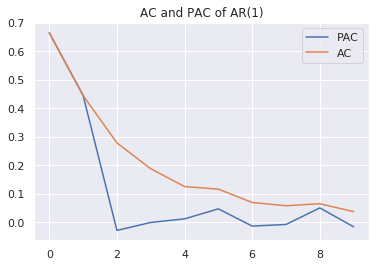

In [33]:
plt.plot(pac, label="PAC")
plt.plot(ac,label="AC")
plt.legend()
plt.title("AC and PAC of AR(1)")
plt.savefig("AR_AC_PAC.png")

# MA

In [0]:
theta =0.6
T=1000
epsilon = np.random.randn(100000)

In [0]:
Y = np.zeros(T+1)
for i in range(1,T):
    Y[i] = epsilon[i] + theta*epsilon[i-1]

In [0]:
n=30
pac=[]
ac=[]
for k in range(n):
    pac=np.append(pac,Pac(Y,k+1))
    ac = np.append(ac,autcor(Y,k+1))

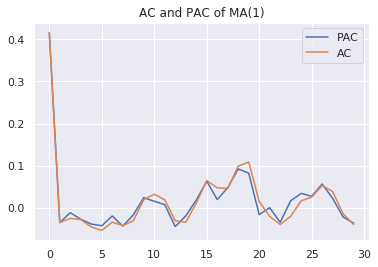

In [48]:
plt.plot(pac, label="PAC")
plt.plot(ac,label="AC")
plt.legend()
plt.title("AC and PAC of MA(1)")
plt.savefig("MA_AC_PAC.png")